#Team Details :
## CS23MTECH11020 - Suryansh Gautam
## CS23MTECH11008 - V Harikrishnan
## CS23MTECH11029 - Patel Heetkumar D.
## CS23MTECH13001 - Anil kumar Sharma
## CS23MTECH13002 - KR Anuraj


Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch as tc
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
import torch.optim as optim
from tqdm import tqdm, trange
from torch.utils.data import DataLoader
from torchvision import transforms
from sklearn.metrics import confusion_matrix, f1_score, classification_report

Mounting google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


Reading dataset and preprocessing

In [ ]:
cd drive/MyDrive

/content/drive/MyDrive


In [ ]:
df = pd.read_csv('creditcard.csv')

In [ ]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df['log_time'] = df['Time'].apply(lambda x: np.log(x) if x != 0 else 0)

In [ ]:
df['log_amt'] = df['Amount'].apply(lambda x: np.log(x) if x != 0 else 0)

In [ ]:
norm_data = df[df['Class'] == 0]
fraud_data = df[df['Class'] == 1]

In [ ]:
fraud_data.shape

(492, 33)

In [ ]:
df.shape

(284807, 33)

In [ ]:
train_data = norm_data.drop(columns=['Amount', 'Time'], inplace=False)
test_data = fraud_data.drop(columns=['Amount', 'Time'], inplace=False)


In [ ]:
print(type(train_data))
print(type(test_data))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:

num_train = int(len(train_data) * 0.75)

temp = train_data.iloc[:num_train].drop(columns=['Class'], inplace=False)
test_data = pd.concat([test_data, train_data.iloc[num_train:]], ignore_index=True)

train_data = temp
test_data.shape

(71571, 31)

In [ ]:
train_data.iloc[0].values.shape

(30,)

In [ ]:
scaler = MinMaxScaler()
cols = train_data.columns.tolist()
train_data_norm = train_data.copy()
train_data_norm[cols] = scaler.fit_transform(train_data[cols])

test_data_norm = test_data.copy()
test_data_norm[cols] = scaler.fit_transform(test_data[cols])
shift_col = test_data_norm.pop('Class')

test_data_norm['Class'] = shift_col

In [ ]:
test_data_norm.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,log_time,log_amt,Class
71566,0.709311,0.834542,0.736488,0.167437,0.758395,0.193932,0.235393,0.791948,0.720411,0.782010,...,0.521704,0.636555,0.307915,0.686199,0.390492,0.260250,0.523257,0.999994,0.294314,0
71567,0.935411,0.694747,0.963607,0.231090,0.802009,0.232853,0.265504,0.677119,0.658003,0.637949,...,0.568810,0.619627,0.239048,0.547826,0.266247,0.239140,0.495016,0.999995,0.529546,0
71568,0.989204,0.691349,0.862489,0.239754,0.814341,0.253802,0.263547,0.683893,0.650852,0.651219,...,0.548742,0.618783,0.464090,0.606899,0.325527,0.237596,0.495884,0.999996,0.597796,0
71569,0.945397,0.702831,0.938110,0.299551,0.793289,0.228237,0.261175,0.683414,0.648957,0.653533,...,0.561602,0.616658,0.393857,0.550363,0.447606,0.240114,0.500104,0.999996,0.468035,0
71570,0.939455,0.692889,0.938126,0.242225,0.795846,0.214715,0.274963,0.665498,0.653374,0.639584,...,0.552501,0.625782,0.378313,0.556830,0.184800,0.237430,0.497178,1.000000,0.676538,0


Autoencoder Model

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(30, 20),
            nn.ReLU(),
            nn.BatchNorm1d(20),
            nn.Linear(20, 10),
            nn.ReLU()

        )

        self.decoder = nn.Sequential(
            nn.Linear(10, 20),
            nn.ReLU(),
            nn.BatchNorm1d(20),
            nn.Linear(20, 30),
            nn.ReLU()
        )

    def forward(self, x):
        hidden_rep = self.encoder(x)
        recon_rep = self.decoder(hidden_rep)
        return recon_rep

Training autoencoder model

In [ ]:
def train_autoencoder(model, dataset, lr = 0.001):
  criterion = nn.MSELoss()

  optimizer = optim.Adam(model.parameters(), lr=lr)
  data_len = dataset.shape[0]
  num_epochs = 10
  device = tc.device("cuda" if tc.cuda.is_available() else "cpu")
  train_loader = DataLoader(dataset, shuffle=True, batch_size=100)

  for epoch in trange(num_epochs, desc="Training"):
        train_loss = 0.0
        for batch in tqdm(train_loader, desc=f"Epoch {epoch + 1} in training", leave=False):
            x = batch
            y_hat = model(x)

            loss = criterion(y_hat, x)

            train_loss += loss.detach().cpu().item()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        print(f"Epoch {epoch + 1}/{num_epochs} loss: {train_loss:.4f}")

In [ ]:
tc.manual_seed(50)
model = Autoencoder()
train_autoencoder(model, tc.tensor(train_data_norm.values).float())

Training:  10%|█         | 1/10 [00:07<01:10,  7.85s/it]

Epoch 1/10 loss: 31.0155



Training:  20%|██        | 2/10 [00:14<00:55,  6.90s/it]

Epoch 2/10 loss: 4.0026



Training:  30%|███       | 3/10 [00:21<00:50,  7.24s/it]

Epoch 3/10 loss: 3.0418



Training:  40%|████      | 4/10 [00:27<00:40,  6.82s/it]

Epoch 4/10 loss: 2.9407



Training:  50%|█████     | 5/10 [00:35<00:35,  7.13s/it]

Epoch 5/10 loss: 2.9008



Training:  60%|██████    | 6/10 [00:41<00:27,  6.85s/it]

Epoch 6/10 loss: 2.8948



Training:  70%|███████   | 7/10 [00:49<00:21,  7.11s/it]

Epoch 7/10 loss: 2.8850



Training:  80%|████████  | 8/10 [00:55<00:13,  6.82s/it]

Epoch 8/10 loss: 2.8980



Training:  90%|█████████ | 9/10 [01:03<00:07,  7.05s/it]

Epoch 9/10 loss: 2.8748



Training: 100%|██████████| 10/10 [01:09<00:00,  6.96s/it]

Epoch 10/10 loss: 2.8700


Evaluating autoencoder model

In [ ]:

model.eval()

test_data = tc.tensor(test_data_norm.values).float()
mini = 10
threshold = 0.033
criterion = nn.MSELoss()
true_labels = []
predicted_labels = []

with tc.no_grad():
    for row in test_data:
        input = row[:-1].unsqueeze(dim=0)
        output = model(input)
        error = criterion(output, input)
        mini = min(error, mini)
        predicted = 0 if (error.item() < threshold) else 1
        true_labels.append(row[-1])
        predicted_labels.append(predicted)

accuracy = np.mean(np.array(true_labels) == np.array(predicted_labels))
print('Accuracy: {:.2f}%'.format(accuracy * 100))

conf_matrix = confusion_matrix(true_labels, predicted_labels)
print('Confusion Matrix:')
print(conf_matrix)

f1 = f1_score(true_labels, predicted_labels, average='weighted')
print('F1 Score: {:.4f}'.format(f1))

report = classification_report(true_labels, predicted_labels)
print(report)

Accuracy: 76.31%
Confusion Matrix:
[[54302 16777]
 [  175   317]]
F1 Score: 0.8593
              precision    recall  f1-score   support

         0.0       1.00      0.76      0.86     71079
         1.0       0.02      0.64      0.04       492

    accuracy                           0.76     71571
   macro avg       0.51      0.70      0.45     71571
weighted avg       0.99      0.76      0.86     71571



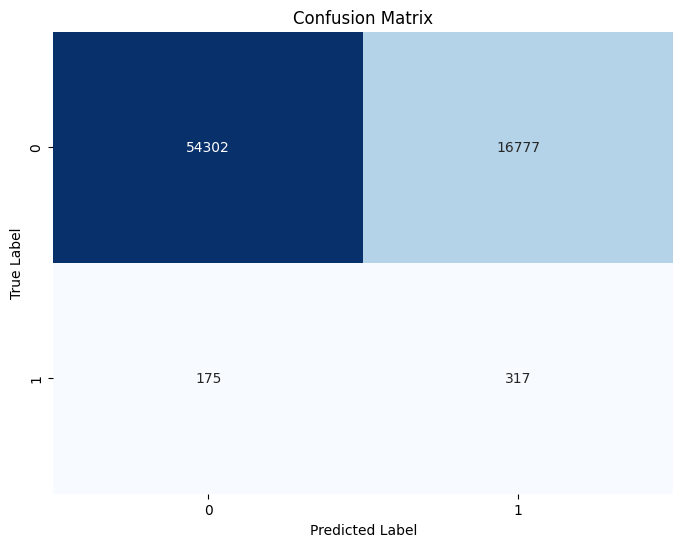

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
for name, param in model.decoder.named_parameters():
    if 'weight' in name:
        print(name)
        print(param.data.max())

0.weight
tensor(0.5245)
2.weight
tensor(1.0949)
3.weight
tensor(0.5239)


In [ ]:
mini

tensor(0.0184)

In [ ]:
temp = tc.tensor(train_data_norm.values).float()
input = temp[-1].unsqueeze(0)
output = model(input)
error = criterion(output, input)
error

tensor(0.0004, grad_fn=<MseLossBackward0>)

Variational Autoencoder model

In [ ]:
class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(30, 20),
            nn.ReLU(),
            nn.BatchNorm1d(20),
            nn.Linear(20, 10),
            nn.ReLU()

        )

        self.decoder = nn.Sequential(
            nn.Linear(5, 15),
            nn.ReLU(),
            nn.BatchNorm1d(15),
            nn.Linear(15, 30),
            nn.ReLU()
        )


    def forward(self, x):
        hidden_rep = self.encoder(x)
        mean, logvar=tc.chunk(hidden_rep, 2, dim=1)
        epsilon=tc.randn_like(mean).to(mean.device)
        z=mean+tc.exp(0.5 * logvar)*epsilon
        recon_rep = self.decoder(z)
        return recon_rep, mean, logvar

Mean square Loss function

In [ ]:
def loss_fn(x, x_hat, mean, logvar):
  mse=tc.mean(tc.square(x_hat-x))
  kld=-0.5*tc.sum(1+logvar-mean.pow(2)-logvar.exp())
  return mse+kld

Training variational autoencoder

In [ ]:
def train_VAE(model, dataset, lr = 0.001):
  criterion = nn.MSELoss()


  optimizer = optim.Adam(model.parameters(), lr=lr)
  data_len = dataset.shape[0]
  num_epochs = 10
  device = tc.device("cuda" if tc.cuda.is_available() else "cpu")
  train_loader = DataLoader(dataset, shuffle=True, batch_size=100)

  for epoch in trange(num_epochs, desc="Training"):
        train_loss = 0.0
        for batch in tqdm(train_loader, desc=f"Epoch {epoch + 1} in training", leave=False):
            x = batch
            y_hat, mean, logvar = model(x)

            loss = loss_fn(y_hat, x, mean, logvar)

            train_loss += loss.detach().cpu().item()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        print(f"Epoch {epoch + 1}/{num_epochs} loss: {train_loss:.4f}")

In [ ]:
tc.manual_seed(50)
model = VAE()
train_VAE(model, tc.tensor(train_data_norm.values).float())

Training:  10%|█         | 1/10 [00:08<01:18,  8.67s/it]

Epoch 1/10 loss: 1124.2636



Training:  20%|██        | 2/10 [00:20<01:24, 10.57s/it]

Epoch 2/10 loss: 7.4874



Training:  30%|███       | 3/10 [00:30<01:12, 10.33s/it]

Epoch 3/10 loss: 6.4395



Training:  40%|████      | 4/10 [00:39<00:59,  9.88s/it]

Epoch 4/10 loss: 6.4013



Training:  50%|█████     | 5/10 [00:49<00:48,  9.71s/it]

Epoch 5/10 loss: 6.4894



Training:  60%|██████    | 6/10 [00:58<00:38,  9.68s/it]

Epoch 6/10 loss: 6.4159



Training:  70%|███████   | 7/10 [01:07<00:28,  9.34s/it]

Epoch 7/10 loss: 6.3900



Training:  80%|████████  | 8/10 [01:17<00:18,  9.41s/it]

Epoch 8/10 loss: 6.3826



Training:  90%|█████████ | 9/10 [01:25<00:09,  9.05s/it]

Epoch 9/10 loss: 6.3814



Training: 100%|██████████| 10/10 [01:33<00:00,  9.37s/it]

Epoch 10/10 loss: 6.3786


Evaluating variational autoencoder model

In [ ]:
model.eval()

test_data = tc.tensor(test_data_norm.values).float()
mini = 10
threshold = 0.0375
criterion = nn.MSELoss()
true_labels = []
predicted_labels = []

with tc.no_grad():
    for row in test_data:
        input = row[:-1].unsqueeze(dim=0)
        output, mean, logvar = model(input)
        error = criterion(output, input)
        mini = min(error, mini)
        predicted = 0 if (error.item() < threshold) else 1
        true_labels.append(row[-1])
        predicted_labels.append(predicted)

accuracy = np.mean(np.array(true_labels) == np.array(predicted_labels))
print('Accuracy: {:.2f}%'.format(accuracy * 100))

conf_matrix = confusion_matrix(true_labels, predicted_labels)
print('Confusion Matrix:')
print(conf_matrix)

f1 = f1_score(true_labels, predicted_labels, average='weighted')
print('F1 Score: {:.4f}'.format(f1))

report = classification_report(true_labels, predicted_labels)
print(report)

Accuracy: 76.48%
Confusion Matrix:
[[54432 16647]
 [  187   305]]
F1 Score: 0.8604
              precision    recall  f1-score   support

         0.0       1.00      0.77      0.87     71079
         1.0       0.02      0.62      0.03       492

    accuracy                           0.76     71571
   macro avg       0.51      0.69      0.45     71571
weighted avg       0.99      0.76      0.86     71571



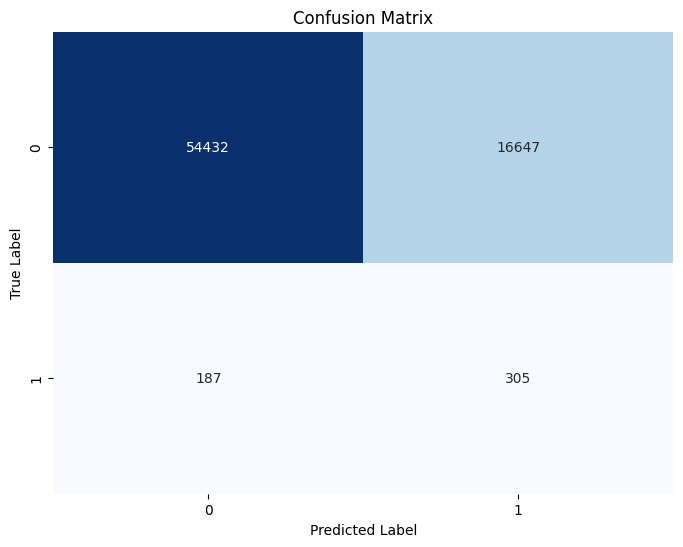

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()